# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

    ### Student Name: Erica Leverson

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
import requests
from bs4 import BeautifulSoup


1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

In [3]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [4]:
soup = BeautifulSoup(article_html, 'html5lib')

In [5]:
article_content = soup.find('article')
print(article_content)

<article class="post-466450 post type-post status-publish format-standard has-post-thumbnail hentry category-car-hacks category-engineering category-featured category-laser-hacks category-slider tag-laser tag-laser-headlight tag-laser-headlights tag-light" id="post-466450" itemscope="" itemtype="http://schema.org/Article">
    <header class="entry-header">
        <h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
        <div class="entry-meta">
            <a class="comments-counts" href="https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/#comments"><span class="icon-hackaday icon-hackaday-comment"></span>
                130 Comments            </a>
            <ul class="meta-authors vcard author">
                <li>by:</li>
                <span class="fn"><a class="author url fn" href="https://web.archive.org/web/20210327165005/https://hackaday.com/author/lewinday/" rel="author" title="Posts by Lewin Day">Lew

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [6]:
print(article_content.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())


In [37]:
from collections import Counter
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [str(token).lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
for word, count in word_freq.most_common(5):
    print(f"word: {word} frequency: {count}")


word: laser frequency: 35
word: headlights frequency: 19
word: headlight frequency: 11
word: technology frequency: 10
word: led frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [12]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [26]:
cool_words = set()
for lemma, freq in lemma_freq.most_common(5):
    cool_words.add(lemma)
print(cool_words)

{'led', 'beam', 'technology', 'laser', 'headlight'}


In [27]:
sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in cool_words:
            count += 1
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count,':', sent_str)

0 :       
1 : How Laser Headlights Work                  130 Comments                    by:        Lewin Day                    March 22, 2021
2 :                                             When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
3 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
3 : Now, a new technology is on the scene, with lasers!Laser Headlights?!
0 : 
2 : BWM’s prototype laser headlight assemblies undergoing testing.
0 : 
4 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the fr

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [29]:
from matplotlib import pyplot as plt

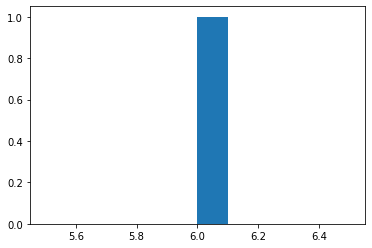

In [30]:
plt.hist(count,10)
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [40]:
sentence_scores=[]
for sentence in sentences:
    score = 0
    for token in sentence:
        #score+= token.lemma_:
        print(token.lemma_)
    #sentence_scores.append(score)
#print(sentence_scores)


    
        
how
Laser
Headlights
Work

        
            
                
130
comment
           
            
                
by
:

                
Lewin
Day

            
        

        
            
March
22
,
2021

            
                
                
            
        

        
    

    
        
when
we
think
about
the
onward
march
of
automotive
technology
,
headlight
be
n’t
usually
the
first
thing
that
come
to
mind
.
engine
,
fuel
efficiency
,
and
the
switch
to
electric
power
be
all
more
front
of
mind
.
however
,
that
do
n’t
mean
there
be
n’t
thousand
of
engineer
around
the
world
work
to
improve
the
state
of
the
art
in
automotive
lighting
day
in
,
day
out
.


sealed
beam
headlight
give
way
to
more
modern
design
once
regulation
loosen
up
,
while
bulb
move
from
simple
halogen
to
xenon
hid
and
,
more
recently
,
led
.
now
,
a
new
technology
be
on
the
scene
,
with
laser
!



Laser
Headlights
?
!


BWM
’s
prototype
laser
headlight
assembly
undergo
testing
.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).